## Setting Environment

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from google.colab import files

%matplotlib inline

## Data cleaning

In [2]:
# read file csv
df = pd.read_csv("/content/Data_raw_final.csv") 
df.head(3)

,Timestamp,รหัสนักศึกษา มจธ. (หากไม่มีให้เว้นไว้),เพศ,ถนัดมือข้างไหน,คิดว่าตัวเองถนัดใช้สมองซีกไหน,สมองLeft brain (กรอกเฉพาะตัวเลข),สมองRight brain (กรอกเฉพาะตัวเลข),ถนัดเรื่องไหน (นำคำตอบมาจากกรอบหมายเลข 1)
0,11/30/2021 11:14:46,64070505231,Male,Right hand,Left brain,56,44,Reasoning
1,11/30/2021 11:29:24,64070505241,Female,Right hand,Left brain,37,63,Memory
2,11/30/2021 11:32:02,64070505218,Female,Right hand,Right brain,43,57,Art


In [3]:
# 5206 Kaew
# change column's name
change_col = {'รหัสนักศึกษา มจธ. (หากไม่มีให้เว้นไว้)':'Student_ID',
              'เพศ':'Gender',
              'ถนัดมือข้างไหน': 'Hand',
              'คิดว่าตัวเองถนัดใช้สมองซีกไหน':'Expected_brain',
              'สมองLeft brain (กรอกเฉพาะตัวเลข)' :'Left_brain',
              'สมองRight brain (กรอกเฉพาะตัวเลข)' :'Right_brain',
              'ถนัดเรื่องไหน (นำคำตอบมาจากกรอบหมายเลข 1)':'Personality'
              }
df.rename(columns=change_col, inplace=True)
df.head(2)

,Timestamp,Student_ID,Gender,Hand,Expected_brain,Left_brain,Right_brain,Personality
0,11/30/2021 11:14:46,64070505231,Male,Right hand,Left brain,56,44,Reasoning
1,11/30/2021 11:29:24,64070505241,Female,Right hand,Left brain,37,63,Memory


In [4]:
# 5206 Kaew
# delete columns
del_col = ['Timestamp','Student_ID']
df.drop(del_col, axis=1, inplace=True)
df.head(2)

,Gender,Hand,Expected_brain,Left_brain,Right_brain,Personality
0,Male,Right hand,Left brain,56,44,Reasoning
1,Female,Right hand,Left brain,37,63,Memory


In [5]:
# 5206 Kaew
# count total records
dataShape = df.shape
n = dataShape[0]
m = dataShape[1]
print("Raw data contains",n,"records.")
print("Raw data contains",m,"columns.")

Raw data contains 50 records.
Raw data contains 6 columns.


## Create new columns derive from exist column

In [6]:
# 5231 Floyd
# Realbrain function 
def realbrain(row):
  if row['Left_brain'] > 50:
    return 'Left brain'
  elif row['Left_brain'] == 50:
    return 'Both'
  else :
    return 'Right brain'

In [7]:
# 5231 Floyd
# apply realbrain function for create Realbrain column
df['Realbrain'] = df.apply(realbrain, axis=1)
df.head(3)

,Gender,Hand,Expected_brain,Left_brain,Right_brain,Personality,Realbrain
0,Male,Right hand,Left brain,56,44,Reasoning,Left brain
1,Female,Right hand,Left brain,37,63,Memory,Right brain
2,Female,Right hand,Right brain,43,57,Art,Right brain


In [8]:
# 5231 Floyd 
# Percentage from real brain function
def realbrain_100(row):
  if row['Realbrain'] == 'Left brain' :
    return row['Left_brain']
  if row['Realbrain'] == 'Right brain':
    return row['Right_brain']

In [9]:
# 5231 Floyd 
#  apply realbrain_100 function for create Realbrain column
df['Percent_realbrain'] = df.apply(realbrain_100, axis=1)
df.head(3)

,Gender,Hand,Expected_brain,Left_brain,Right_brain,Personality,Realbrain,Percent_realbrain
0,Male,Right hand,Left brain,56,44,Reasoning,Left brain,56
1,Female,Right hand,Left brain,37,63,Memory,Right brain,63
2,Female,Right hand,Right brain,43,57,Art,Right brain,57


## Create contingency table

In [10]:
# 5206 Kaew
class ctg_table:
  #raw_data = ""
  columnA = ""
  columnB = ""

  def __init__(self, columnA, columnB):

    self.columnA = columnA
    self.columnB = columnB

  def with_total(self):
    ctg_with_total = pd.crosstab(self.columnA, self.columnB, margins=True)
    return ctg_with_total

  def without_total(self):
    ctg_without_total = pd.crosstab(self.columnA, self.columnB)
    return ctg_without_total



In [11]:
# 5206 Kaew
# display contingency table 
# 1.Contingency table with total column
print("Contingency table of Hand and brain with total.") 
print()
test1 = ctg_table(df["Hand"] , df["Realbrain"])
display(test1.with_total())
test1_ctg_total = test1.with_total()
print("*****************************************************")
# 2.Contingency table without total column 
print("Contingency table of Hand and brain without total.")
print()
display(test1.without_total())
test1_ctg_nototal = test1.without_total()       

Contingency table of Hand and brain with total.



Realbrain,Left brain,Right brain,All
Hand,,,
Left hand,3,5,8
Right hand,30,12,42
All,33,17,50


*****************************************************
Contingency table of Hand and brain without total.



Realbrain,Left brain,Right brain
Hand,,
Left hand,3,5
Right hand,30,12


## Crame's V

### Chi-square formula

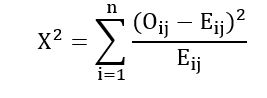

In [12]:
# 5206 Kaew
# calculate chi-square(x^2)
def chi2_manual (ctg_withtotal):
  # Expected values = (maxrow*maxcol)/total 
  #-----------Expected Values--------------#
  exp_ctg = ctg_withtotal.copy()
  exp_ctg.iloc[:,:] = np.multiply.outer(exp_ctg.sum(axis=1).values, exp_ctg.sum(axis=0).values) /exp_ctg.sum().sum()           
  print('---Expected (E)---')
  display(exp_ctg)
  

  # square distance = ((observe-expected)^2)/expected        
  # calculate chi-square values
  chi2 = ((ctg_withtotal - exp_ctg)**2) / exp_ctg    
  chi2.loc[:,'All']= chi2.sum(axis=1)
  chi2.loc['All']= chi2.sum()
  print('---Chi-Square---')
  display(chi2)

      
  #get chi-square score   
  chi_square_score = chi2.iloc[:-1,:-1].sum().sum()
    
  return chi_square_score




In [13]:
# 5206 Kaew
# calling chi-square function
chi2_score = chi2_manual(test1_ctg_total)
print("Chi square score between hand and brain is equal to ",chi2_score)

---Expected (E)---


Realbrain,Left brain,Right brain,All
Hand,,,
Left hand,5.28,2.72,8.0
Right hand,27.72,14.28,42.0
All,33.00,17.00,50.0


---Chi-Square---


Realbrain,Left brain,Right brain,All
Hand,,,
Left hand,0.984545,1.911176,2.895722
Right hand,0.187532,0.364034,0.551566
All,1.172078,2.275210,3.447288


Chi square score between hand and brain is equal to  3.4472880061115356


### Cramer's V formula

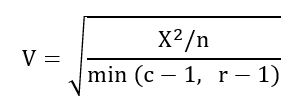

In [41]:
# 5206 Kaew
# calculate cramer's v value
def cramer_v(x2, num_row, num_col, data_size):
  cramer = math.sqrt((x2/data_size)/(min((num_col)-1, (num_row)-1)))
  deg_freedom = min((num_col)-1, (num_row)-1)
  return cramer, deg_freedom


In [15]:
# 5206 Kaew
# assign shape of contingencytable to variable
ctg_shape = test1_ctg_nototal.shape
nrow_ctg = ctg_shape[0]
ncol_ctg = ctg_shape[1]

# checker
# print("nrow_ctg = ",nrow_ctg)
# print("ncol_ctg = ",ncol_ctg)
# print("n = ",n )

In [16]:
# 5206 Kaew
cramer, deg_freedom = cramer_v(chi2_score, ncol_ctg, nrow_ctg, n )
print("Cramer's V score between hand and brain is equal to ",cramer)
print("Degree of freedom between hand and brain is equal to ",deg_freedom)

Cramer's V score between hand and brain is equal to  0.2625752465908215
Degree of freedom between hand and brain is equal to  1


### Cramer's V interpretation table

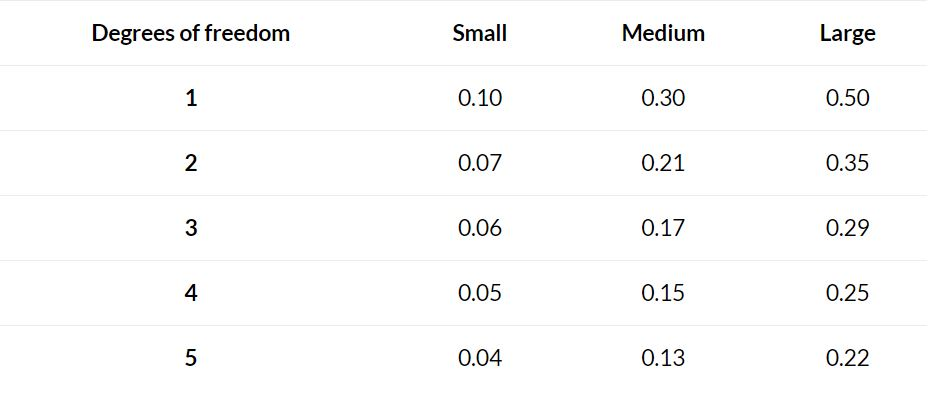

In [17]:
# 5206 Kaew
# Cramer's V interpretation
def cramer_itp(score, deg):
  # degree of freedom = 1
  if deg == 1:
    if score < 0.1:
      return "no relationship" 
    elif score >= 0.1:
      return "small"
    elif score >= 0.3:
      return "medium"
    elif score >= 0.5:
      return "large"
  
  # degree of freedom = 2  
  elif deg == 12:
    if score < 0.07:
      return "no relationship" 
    elif score >= 0.07:
      return "small"
    elif score >= 0.21:
      return "medium"
    elif score >= 0.35:
      return "large"

In [18]:
# 5206 Kaew
# display cramer's v interpretation
cmv_itp = cramer_itp(cramer,deg_freedom)
print(f"Cramer's V = {cramer} and degrees of freedom = {deg_freedom}\nindicates a {cmv_itp} association between hand and brain")

Cramer's V = 0.2625752465908215 and degrees of freedom = 1
indicates a small association between hand and brain


## Goodman Kruskal's lambda

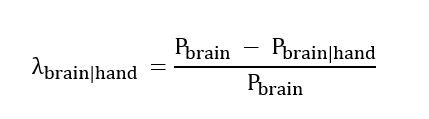







In [19]:
# 5206 Kaew
def goodman (ctg_rawtotal, ctg_rawnototal, n):
  #------- Find maximum in each column from contingency with total --------------#
  #ctg_total = test1_ctg_total
  ctg_total_arr = ctg_rawtotal.to_numpy()
  maxcolArr = np.amax(ctg_total_arr, axis=0)
  #print(maxcolArr,"MaxcolArr")
  max_colArr = max(maxcolArr[0:-1])
  print("Max value in column (exclude last column) : ",max_colArr)

  #------- Find maximum in each row from contingency without total   -------------# 
  #ctg_nototal = test1_ctg_nototal
  ctg_nototal_arr = ctg_rawnototal.to_numpy()
  maxrowArr = np.amax(ctg_nototal_arr, axis=1)
  #print("maxrowArr",maxrowArr)

  #------- Sum maximum in each row --------------#
  summaxrow = 0
  for element in maxrowArr:
    summaxrow += element
  
  summax_row =summaxrow
  print("Summation of max value in each row : ",summax_row)
  #-------- Prob E -------------------# 
  probE = 1-(max_colArr/n)
  print("Reduction error probability  of event : ",probE)

  #---------Prob E|x -----------------#
  probEX = 1-(summax_row/n)
  print("Reduction error probability of event depends on another variable : ",probEX)

  #----------Lambda--------------------#
  lambda_EX = (probE-probEX)/probE

  return lambda_EX


                

In [20]:
# 5206 Kaew
# display result from Goodman-Kruskal's lambda for predicting brain from hand data
know_hand = goodman(test1_ctg_total, test1_ctg_nototal, n)
pc_knowHand = know_hand*100
print("***************************************************************************************")
print("Reduction error probability for predicting brain from hand : %.3f " %know_hand)
print()
print(f"It's mean that if we predict brain based on hand data can reduce {pc_knowHand:.2f} % of error. " )

Max value in column (exclude last column) :  33
Summation of max value in each row :  35
Reduction error probability  of event :  0.33999999999999997
Reduction error probability of event depends on another variable :  0.30000000000000004
***************************************************************************************
Reduction error probability for predicting brain from hand : 0.118 

It's mean that if we predict brain based on hand data can reduce 11.76 % of error. 


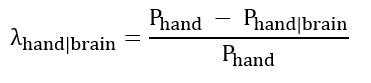

* note: Transpose contingency table before calculated

In [21]:
# 5206 Kaew
# tranposed contingency table for predicting hand based on brain data
Tp_total = test1_ctg_total.transpose()
display(Tp_total)
print("***********************************************")

Tp_nototal = test1_ctg_nototal.transpose()
display(Tp_nototal)

Hand,Left hand,Right hand,All
Realbrain,,,
Left brain,3,30,33
Right brain,5,12,17
All,8,42,50


***********************************************


Hand,Left hand,Right hand
Realbrain,,
Left brain,3,30
Right brain,5,12


In [22]:
# 5206 Kaew
# display result from Goodman-Kruskal's lambda for predicting hand from brain data
know_brain = goodman(Tp_total, Tp_nototal, n)
pc_knowBrain = know_brain*100
print("***************************************************************************************")
print("Reduction error probability for predicting hand from brain : %.3f " %know_brain)
print()
print(f"It's mean that if we predict hand based on brain data can reduce {pc_knowBrain:.2f} % of error. " )

Max value in column (exclude last column) :  42
Summation of max value in each row :  42
Reduction error probability  of event :  0.16000000000000003
Reduction error probability of event depends on another variable :  0.16000000000000003
***************************************************************************************
Reduction error probability for predicting hand from brain : 0.000 

It's mean that if we predict hand based on brain data can reduce 0.00 % of error. 


## Explore overall data

In [23]:
df.head()

,Gender,Hand,Expected_brain,Left_brain,Right_brain,Personality,Realbrain,Percent_realbrain
0,Male,Right hand,Left brain,56,44,Reasoning,Left brain,56
1,Female,Right hand,Left brain,37,63,Memory,Right brain,63
2,Female,Right hand,Right brain,43,57,Art,Right brain,57
3,Female,Right hand,Left brain,36,54,Art,Right brain,54
4,Female,Right hand,Right brain,40,60,Art,Right brain,60


In [24]:
# 5206 Kaew
# create Frequency Distribution Table focused on actual brain
pd.crosstab([df['Gender'], df['Hand']], df['Realbrain'], margins=True)

Realbrain          Left brain  Right brain  All
Gender Hand                                    
Female Left hand            3            3    6
       Right hand          20            9   29
Male   Left hand            0            2    2
       Right hand          10            3   13
All                        33           17   50

In [25]:
# 5206 Kaew
# create Frequency Distribution Table focused on expected brain 
pd.crosstab([df['Gender'], df['Hand']], df['Expected_brain'], margins=True)

Expected_brain     Left brain  Right brain  All
Gender Hand                                    
Female Left hand            2            4    6
       Right hand          15           14   29
Male   Left hand            1            1    2
       Right hand           8            5   13
All                        26           24   50

In [26]:
# 5206 Kaew
# create Frequency Distribution Table focused on personality
pd.crosstab(df['Realbrain'], df['Personality'], margins=True)

Personality,Analysis,Art,Fairness,Imagination,Instinct,Mathematics,Memory,Reasoning,Symbolic,Tidiness,All
Realbrain,,,,,,,,,,,
Left brain,4,0,6,0,0,3,0,18,1,1,33
Right brain,0,7,0,3,1,0,6,0,0,0,17
All,4,7,6,3,1,3,6,18,1,1,50


In [27]:
df.head(2)

,Gender,Hand,Expected_brain,Left_brain,Right_brain,Personality,Realbrain,Percent_realbrain
0,Male,Right hand,Left brain,56,44,Reasoning,Left brain,56
1,Female,Right hand,Left brain,37,63,Memory,Right brain,63


## Graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


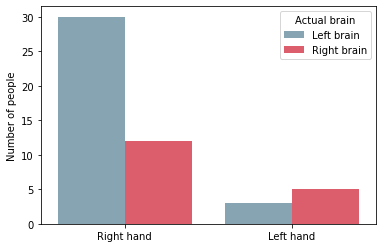

In [28]:
# 5231 Floyd
# number of left-right brain group by hand 
countbar = sns.countplot(df.Hand, hue = df.Realbrain , palette=['#7FA7B8',"#F1485B"])
countbar.set( xlabel=None,ylabel='Number of people')
countbar.legend(title='Actual brain')

plt.show()
# plt.savefig("countplot2.png",dpi=(350))
# files.download("countplot2.png") 


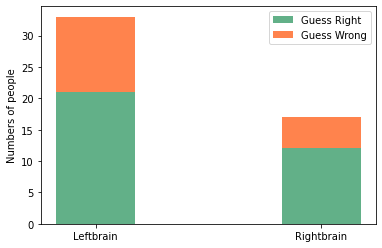

In [29]:
#5231 Floyd
# number of number of left-right brain group by expected  
labels = ["Leftbrain", "Rightbrain"]
GR_means = [21,12]
GW_means = [12,5]

width = 0.35       

fig, ax = plt.subplots()

ax.bar(labels, GR_means, width, label='Guess Right', color='#62b088')
ax.bar(labels, GW_means, width,  bottom=GR_means, label='Guess Wrong',color="#ff834d")

ax.set_ylabel('Numbers of people')
ax.legend()

plt.show()
# plt.savefig("stack1.png",dpi=(350))
# files.download("stack1.png") 

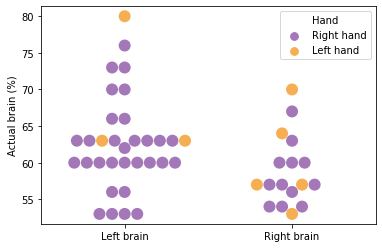

In [30]:
# 5231 Floyd
# distribution of brain percentage group by brain
swarmplt = sns.swarmplot(x=df.Realbrain , y =df.Percent_realbrain, hue= df.Hand, size=12, palette=['#a478b8',"#f5ae52"])
swarmplt.set( xlabel=None,ylabel='Actual brain (%)')
swarmplt.legend(title='Hand')

plt.show()
# plt.savefig("swarm1.png",dpi=(350))
# files.download("swarm1.png") 

In [31]:
# 5206 Kaew
# create personality diactionary
# store personality as keys and counts as values
dict_psn = df['Personality'].value_counts().to_dict()
dict_psn

{'Analysis': 4,
 'Art': 7,
 'Fairness': 6,
 'Imagination': 3,
 'Instinct': 1,
 'Mathematics': 3,
 'Memory': 6,
 'Reasoning': 18,
 'Symbolic': 1,
 'Tidiness': 1}

In [32]:
# 5206 Kaew
# extract keys and values from personality dictionary then store in different list 
psn = list(dict_psn.keys())
num_psn = list(dict_psn.values())
print(psn)
print(num_psn)

['Reasoning', 'Art', 'Memory', 'Fairness', 'Analysis', 'Mathematics', 'Imagination', 'Tidiness', 'Instinct', 'Symbolic']
[18, 7, 6, 6, 4, 3, 3, 1, 1, 1]


In [33]:
# 5206 Kaew
# create function to divide personality in group 
def RL_psn(charList):
  rl_psn =[]
  rightb_psn = ['Memory', 'Music', 'Creativity','Instinct','Imagination','Emotional','Art' ]
  leftb_psn =['Fairness', 'Mathematics', 'Analysis', 'Reasoning', 'Symbolic','Tidiness']
  for i in charList:
    if i in rightb_psn:
      rl_psn.append("Right brain")
    else:
      rl_psn.append("Left brain")
  return rl_psn


In [34]:
# 5206 Kaew
brain_psn = RL_psn(psn)
print(brain_psn)

['Left brain', 'Right brain', 'Right brain', 'Left brain', 'Left brain', 'Left brain', 'Right brain', 'Left brain', 'Right brain', 'Left brain']


In [35]:
# 5206 Kaew
# create new dataframe for count people by personality
dict_psn1 = {"Brain":brain_psn, "Personality":psn,"Count":num_psn}
df_psn1 = pd.DataFrame(dict_psn1)
df_psn1

,Brain,Personality,Count
0,Left brain,Reasoning,18
1,Right brain,Art,7
2,Right brain,Memory,6
3,Left brain,Fairness,6
4,Left brain,Analysis,4
5,Left brain,Mathematics,3
6,Right brain,Imagination,3
7,Left brain,Tidiness,1
8,Right brain,Instinct,1
9,Left brain,Symbolic,1


In [36]:
# 5206 Kaew
# create left brain personality dataframe derive from df_psn1
df_pieL = df_psn1.loc[df_psn1['Brain'] == 'Left brain']
df_pieL

,Brain,Personality,Count
0,Left brain,Reasoning,18
3,Left brain,Fairness,6
4,Left brain,Analysis,4
5,Left brain,Mathematics,3
7,Left brain,Tidiness,1
9,Left brain,Symbolic,1


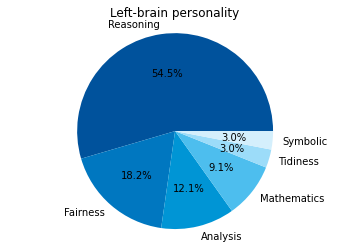

In [37]:
# 5206 Kaew
# pie chart for left brain personality
palette1 = ["#00529c","#0077c0","#0095d5","#4dbeee","#9cdcf9","#d4effc"]
plt.pie(df_pieL['Count'],labels=df_pieL['Personality'],autopct='%1.1f%%', colors=palette1)
plt.title('Left-brain personality')
plt.axis('equal')
plt.show()
# plt.savefig('Lpersona.png',dpi=(350))
# files.download("Lpersona.png") 

In [38]:
# 5206 Kaew
# create right brain personality dataframe derive from df_psn1
df_pieR = df_psn1.loc[df_psn1['Brain'] == 'Right brain']
df_pieR

,Brain,Personality,Count
1,Right brain,Art,7
2,Right brain,Memory,6
6,Right brain,Imagination,3
8,Right brain,Instinct,1


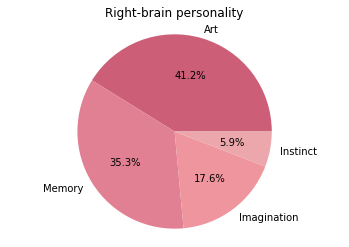

In [39]:
# 5206 Kaew
# pie chart for right brain personality
palette2 = ["#cc5e77","#e18093","#ef959e","#eca7ac"]
plt.pie(df_pieR['Count'],labels=df_pieR['Personality'],autopct='%1.1f%%', colors=palette2)
plt.title('Right-brain personality')
plt.axis('equal')
plt.show()
# plt.savefig('Rpersona.png',dpi=(350))
# files.download("Rpersona.png") 